In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
file_path = 'Solar_power.csv'
data = pd.read_csv(file_path)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [9]:
print(data.isnull().sum())


temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64


In [11]:
data.fillna(data.median(), inplace=True)

In [13]:
features = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
            'shortwave_radiation_backwards_sfc', 'angle_of_incidence', 'zenith', 'azimuth']
X = data[features]
y = data['generated_power_kw']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
y_pred_rf = rf_model.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")


Mean Absolute Error (MAE): 300.43046621942045
Root Mean Squared Error (RMSE): 465.262230527555
R² Score: 0.7630240508685362
Mean Absolute Percentage Error (MAPE): 6390.66%


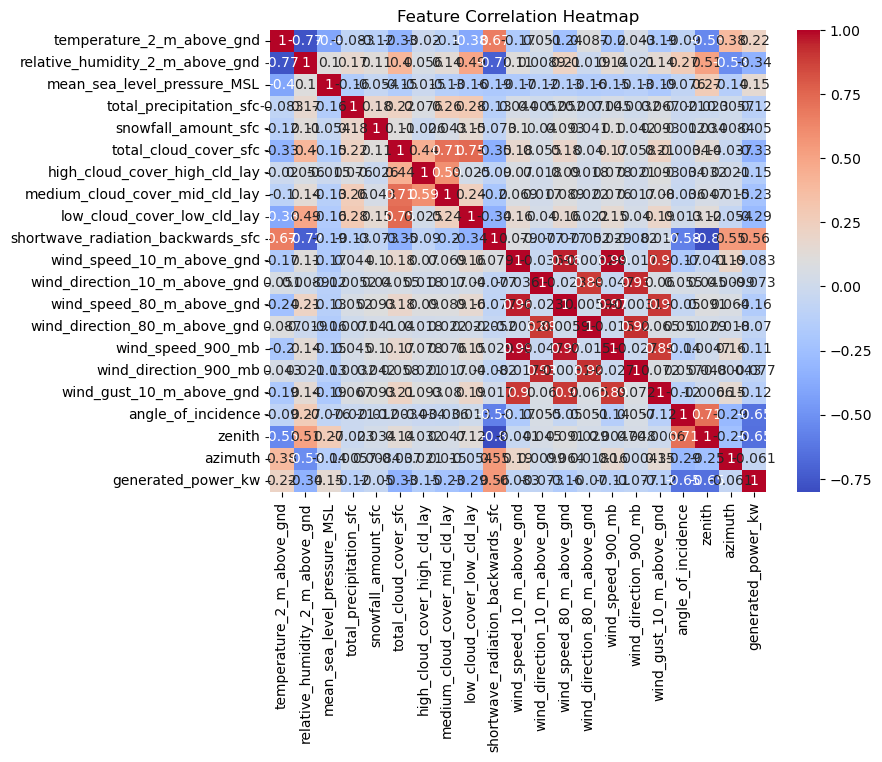

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

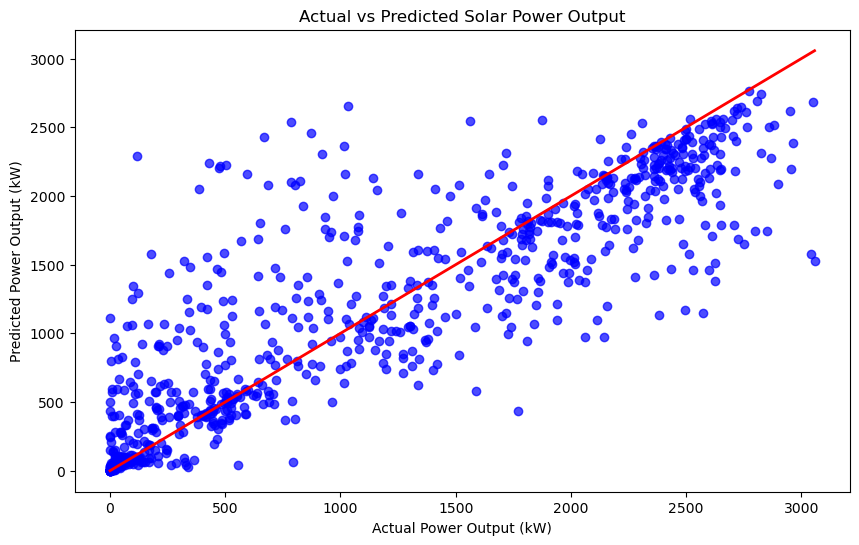

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Actual vs Predicted Solar Power Output")
plt.show()


In [29]:
print("\n--- Solar Power Output Prediction ---")
print("Provide the following inputs:")


--- Solar Power Output Prediction ---
Provide the following inputs:


In [41]:
temp = float(input("Temperature (°C, 2m above ground): "))
humidity = float(input("Relative Humidity (%): "))
radiation = float(input("Shortwave Radiation (W/m²): "))
angle = float(input("Angle of Incidence (degrees): "))
zenith = float(input("Zenith Angle (degrees): "))
azimuth = float(input("Azimuth Angle (degrees): "))



Temperature (°C, 2m above ground):  23
Relative Humidity (%):  45
Shortwave Radiation (W/m²):  12
Angle of Incidence (degrees):  34
Zenith Angle (degrees):  12
Azimuth Angle (degrees):  12


In [43]:
user_input = pd.DataFrame({
    'temperature_2_m_above_gnd': [temp],
    'relative_humidity_2_m_above_gnd': [humidity],
    'shortwave_radiation_backwards_sfc': [radiation],
    'angle_of_incidence': [angle],
    'zenith': [zenith],
    'azimuth': [azimuth]
})

In [45]:
user_input_scaled = scaler.transform(user_input)

In [47]:
predicted_power = rf_model.predict(user_input_scaled)[0]

In [49]:
print(f"\nPredicted Solar Power Output: {predicted_power:.2f} kW")


Predicted Solar Power Output: 1362.40 kW
